## Spotify Modelling Regressor

This kernel is built to find the most ideal model determining the popularity of the track/songs based on the various features in the datasets

The features includes:
* genre :  The category of the track falls into

* artist_name : name of the artist

* track_name : song title

* track_id : track id

* popularity : The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.

* acousticness : A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the     track is acoustic
* danceability:	Danceability describes how suitable a track is for dancing based on a combination of musical elements including  tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* duration_ms: The duration of the track in milliseconds.

* energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

* instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

* key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation 

* liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

* loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

* mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived.

* speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

* tempo: 	The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 

* time_signature: 	An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

* valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('SpotifyFeatures.csv')

In [33]:
df[df['artist_name']=='']

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence


## Data Check

#### Check if there are any NaN values

In [3]:
listFeat = list(df.columns)
listDataType = []
listNull = []
listNullPct = []
listNunique = []
listUniqSample = []

for item in listFeat:
    listDataType.append(str(df[item].dtype))
    listNull.append(df[item].isna().sum())
    listNullPct.append(round((df[item].isna().sum() / len(df))*100,2))
    listNunique.append(df[item].nunique())
    listUniqSample.append(list(df[item].value_counts().head(2).index))

dictionary = {
    'dataFeature' : listFeat,
    'dataType' : listDataType,
    'null' : listNull,
    'nullPct' : listNullPct,
    'unique' : listNunique,
    'uniqueSample' : listUniqSample
}

pd.DataFrame(dictionary)

,dataFeature,dataType,null,nullPct,unique,uniqueSample
0,genre,object,0,0.0,27,"[Comedy, Soundtrack]"
1,artist_name,object,0,0.0,14564,"[Giuseppe Verdi, Giacomo Puccini]"
2,track_name,object,0,0.0,148615,"[Home, You]"
3,track_id,object,0,0.0,176774,"[6sVQNUvcVFTXvlk3ec0ngd, 6AIte2Iej1QKlaofpjCzW1]"
4,popularity,int64,0,0.0,101,"[0, 50]"
5,acousticness,float64,0,0.0,4734,"[0.995, 0.9940000000000001]"
6,danceability,float64,0,0.0,1295,"[0.597, 0.547]"
7,duration_ms,int64,0,0.0,70749,"[240000, 180000]"
8,energy,float64,0,0.0,2517,"[0.721, 0.675]"
9,instrumentalness,float64,0,0.0,5400,"[0.0, 0.912]"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
genre               232725 non-null object
artist_name         232725 non-null object
track_name          232725 non-null object
track_id            232725 non-null object
popularity          232725 non-null int64
acousticness        232725 non-null float64
danceability        232725 non-null float64
duration_ms         232725 non-null int64
energy              232725 non-null float64
instrumentalness    232725 non-null float64
key                 232725 non-null object
liveness            232725 non-null float64
loudness            232725 non-null float64
mode                232725 non-null object
speechiness         232725 non-null float64
tempo               232725 non-null float64
time_signature      232725 non-null object
valence             232725 non-null float64
dtypes: float64(9), int64(2), object(7)
memory usage: 32.0+ MB


Text(0.5, 1.0, 'Popularity Distribution')

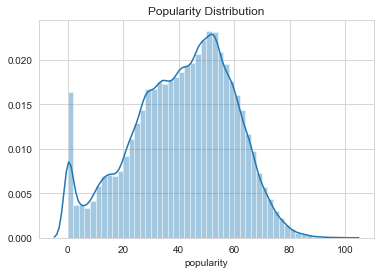

In [5]:
sns.distplot(df['popularity']).set_title('Popularity Distribution')

## Feature Engineering

Based on the features above there are 3 features that needs to be converted into number.  The features are keys, time signature, and mode

In [6]:
#The keys are c,d,e,f,g,a,b,  Since there are 12 letter keys (not distinguishing between major and minor), we will convert A to 0, A# to 1, and so on and so forth until B is 12.

keylists = df['key'].unique()
for i in range(len(keylists)):
    df.loc[df['key'] == keylists[i], 'key'] = i
df.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
140488,Indie,Sleeping At Last,Atlas: One,04l6yHbxMQjmUt4wMuyfWE,54,0.8910,0.402,203032,0.342,0.000004,2,0.101,-9.593,Major,0.0322,119.163,4/4,0.448
120847,Rap,ScHoolboy Q,Ride Out,2glfyBSK3wqoumtEVN1F07,52,0.0315,0.629,287360,0.892,0.000000,6,0.135,-5.254,Minor,0.1220,72.015,4/4,0.448
191136,Ska,The Techniques,My Girl,1lCjNlU4Ht6mzvT2GvmwU3,21,0.7000,0.791,148693,0.379,0.000003,4,0.117,-10.970,Major,0.0434,81.541,4/4,0.615
22071,Dance,Twista,Wetter,4B9zlmKyr1L2wYOoaSAA31,45,0.1640,0.831,251267,0.686,0.000000,4,0.467,-9.796,Major,0.1020,119.970,4/4,0.583
71468,Blues,Walter Trout,Nature's Disappearing,4GNhCtDPEMWHiFrryfhhjh,27,0.4660,0.384,396187,0.582,0.380000,1,0.123,-8.325,Minor,0.0386,85.132,4/4,0.650


also assign the Major & Minor interval into 2 categories, (Major = 1, Minor = 0)

In [7]:
df.loc[df["mode"] == 'Major', "mode"] = 1
df.loc[df["mode"] == 'Minor', "mode"] = 0
df.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
210612,World,Low,Dancing and Blood,2Zm6KDgIYpaKPOG267OBFv,47,0.935000,0.246,382675,0.390,0.9630,9,0.108,-14.166,1,0.0719,160.016,4/4,0.0310
32192,Anime,Hachioji P,Beautiful Nightmare,6DGtjb1k1k84qsjaZBz3YL,20,0.119000,0.564,193378,0.931,0.0000,0,0.162,-3.706,0,0.0419,110.009,4/4,0.6470
201741,Soundtrack,Hans Zimmer,Like A Dog Chasing Cars,6NGXyvnDAmYHc1WOEeA5Lq,35,0.192000,0.507,302533,0.488,0.7600,7,0.111,-15.063,1,0.0449,103.023,4/4,0.0369
34481,Anime,Capcom Sound Team,FINAL WEAPON STAGE 2,6jqUAgVnU5Lio3n4WKwdKl,15,0.000001,0.413,170493,0.704,0.8870,0,0.128,-7.475,1,0.0332,143.956,4/4,0.3320
53152,Blues,JD McPherson,Signs & Signifiers,5T25KeFy1zgExVSPjZO63m,23,0.445000,0.757,285893,0.521,0.0179,2,0.109,-10.879,1,0.0392,93.111,4/4,0.6740


In [8]:
time_signature = df['time_signature'].unique()
for item in range(len(time_signature)):
    df.loc[df['time_signature']==time_signature[item],'time_signature'] = item
df.sample(5)#better using get_DUMMIES

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
106465,Opera,Gaetano Donizetti,"Lucia di Lammermoor / Act 2: ""Se tradirmi tu p...",4F8a93ElKSwkZHLPC8jfYj,9,0.9620,0.357,195800,0.418,0.000783,10,0.2680,-11.505,1,0.0709,136.111,0,0.236
48326,Blues,Beth Hart,Why Don't You Do Right,6FJWCQkxU5cMYO5eUVcCUu,40,0.4660,0.627,275929,0.735,0.003040,8,0.1650,-7.628,0,0.0427,106.017,0,0.670
166549,Rock,FRENSHIP,Capsize,2XMTqoHHSH0lvuXrvIEdco,76,0.0398,0.683,237707,0.708,0.155000,3,0.6860,-6.244,0,0.0305,92.991,0,0.355
90303,Hip-Hop,Skizzy Mars,Recognize (feat. JoJo),6OUJdL8jcNzL3zj8WQ6UDw,51,0.0868,0.738,189747,0.690,0.000000,3,0.1040,-5.837,1,0.0715,100.022,0,0.426
182619,Movie,Alan Menken,Paris Burning,1eHmh2BVeysn8tGRDwYUZv,30,0.7210,0.278,116120,0.200,0.874000,10,0.0763,-16.996,0,0.0390,123.032,0,0.395


In [9]:
df.loc[0]

genre                                     Movie
artist_name                      Henri Salvador
track_name          C'est beau de faire un Show
track_id                 0BRjO6ga9RKCKjfDqeFgWV
popularity                                    0
acousticness                              0.611
danceability                              0.389
duration_ms                               99373
energy                                     0.91
instrumentalness                              0
key                                           0
liveness                                  0.346
loudness                                 -1.828
mode                                          1
speechiness                              0.0525
tempo                                   166.969
time_signature                                0
valence                                   0.814
Name: 0, dtype: object

In [10]:
x = df.drop(['genre','artist_name','track_name','track_id'],axis=1)
y = df['popularity']

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [12]:
def regression(dataframe , target,colomn_to_drop='None'):
    x = dataframe.drop(target,axis=1)
    if(colomn_to_drop != 'None'):
        x = x.drop(colomn_to_drop,axis=1)
    y = dataframe[target]
    x_train,x_test,y_train,y_test = train_test_split(x,y)
    
    algo = [RandomForestRegressor ,Lasso,Ridge,LinearRegression, KNeighborsRegressor,XGBRegressor]
    model = []
    scores = []
    for item in algo:
        if(item == KNeighborsRegressor):
            model.append(item(n_neighbors=15))
        else:
            model.append(item())
        
        
    for item in model:
        item.fit(x_train,y_train)
        prediction = item.predict(x_test)
        mae = metrics.mean_absolute_error(prediction,y_test)
        mse = metrics.mean_squared_error(prediction,y_test)
        rmse =np.sqrt(metrics.mean_squared_error(prediction,y_test))
        temp = [mae,mse,rmse]
        scores.append(temp)
    df = pd.DataFrame(scores,columns=['MAE','MSE','RMSE'] , index=['RandomForestRegressor','Lasso','Ridge','Linear Regression','KNeighborsRegressor','XGBRegressor'])
    return df

In [13]:
regression(df,'popularity',['genre','artist_name','track_name','track_id'])

[16:28:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,MAE,MSE,RMSE
RandomForestRegressor,8.896507,155.967825,12.488708
Lasso,13.752954,286.758611,16.933948
Ridge,12.687758,252.683013,15.896006
Linear Regression,12.687739,252.682980,15.896005
KNeighborsRegressor,13.690330,294.888032,17.172304
XGBRegressor,11.640843,217.681413,14.754030


### Standard Scaler

In [14]:
def regression_scaled(dataframe , target,colomn_to_drop='None'):
    SC =StandardScaler()
    x = dataframe.drop(target,axis=1)
    if(colomn_to_drop != 'None'):
        x = x.drop(colomn_to_drop,axis=1)
    y = dataframe[target]
    scaled_x = SC.fit(x)
    x_scaled=scaled_x.transform(x)
    df_scaled = pd.DataFrame(x_scaled,columns=x.columns)
    x_train,x_test,y_train,y_test = train_test_split(df_scaled,y,test_size=0.2)
    
    algo = [RandomForestRegressor ,Lasso,Ridge,LinearRegression, KNeighborsRegressor,XGBRegressor]
    model = []
    scores = []
    for item in algo:
        model.append(item())
        
    for item in model:
        item.fit(x_train,y_train)
        prediction = item.predict(x_test)
        mae = metrics.mean_absolute_error(prediction,y_test)
        mse = metrics.mean_squared_error(prediction,y_test)
        rmse =np.sqrt(metrics.mean_squared_error(prediction,y_test))
        temp = [mae,mse,rmse]
        scores.append(temp)
    df = pd.DataFrame(scores,columns=['MAE','MSE','RMSE'] , index=['RandomForestRegressor','Lasso','Ridge','Linear Regression','KNeighborsRegressor','XGBRegressor'])
    return df

In [15]:
regression_scaled(df,'popularity',['genre','artist_name','track_name','track_id'])

[16:30:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,MAE,MSE,RMSE
RandomForestRegressor,8.811753,155.151998,12.456003
Lasso,12.977278,260.963702,16.154371
Ridge,12.649568,251.852575,15.869864
Linear Regression,12.649568,251.852578,15.869864
KNeighborsRegressor,11.465691,226.427371,15.047504
XGBRegressor,11.628070,217.747066,14.756255


## PCA

In [16]:
SC =StandardScaler()
scaled_x = SC.fit(x)
x_scaled=scaled_x.transform(x)
df_scaled = pd.DataFrame(x_scaled,columns=x.columns)



In [17]:
cv_scores = []
for item in range(1,11):
    x_pca = PCA(n_components=item).fit_transform(x_scaled)
    cv_mean = cross_val_score(XGBRegressor(),x_pca,y,cv=4).mean()
    cv_scores.append(cv_mean)

[16:31:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:31:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:31:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:31:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:31:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:31:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:32:05] WARNI

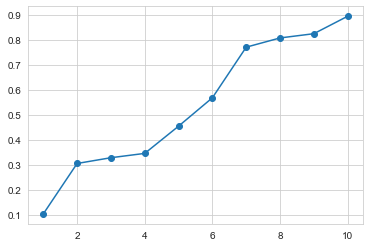

In [18]:
plt.plot([1,2,3,4,5,6,7,8,9,10], cv_scores,marker = 'o')

In [19]:
pca = PCA(n_components=10)
pca_transformed = pca.fit(x_scaled)
x_pca_10 = pca_transformed.transform(x_scaled)
xtrain,xtest,ytrain,ytest = train_test_split(x_pca_10,y)

In [20]:
log_model_pca_10 =RandomForestRegressor().fit(xtrain,ytrain)
pred_pca = log_model_pca_10.predict(xtest)

In [21]:
mae = metrics.mean_absolute_error(ytest,pred_pca)
mse = metrics.mean_squared_error(ytest,pred_pca)
rmse =np.sqrt(metrics.mean_squared_error(ytest,pred_pca))

In [22]:
pd.DataFrame(data=[mae,mse,rmse],columns=['RandomForestRegressor'],index=['mae','mse','rmse'])

,RandomForestRegressor
mae,2.821637
mse,15.997995
rmse,3.999749


In [23]:
mae = metrics.mean_absolute_error(ytest,pred_pca)
mse = metrics.mean_squared_error(ytest,pred_pca)
rmse =np.sqrt(metrics.mean_squared_error(ytest,pred_pca))

In [24]:
algo = [RandomForestRegressor ,Lasso,Ridge,LinearRegression, KNeighborsRegressor,XGBRegressor]
model = []
scores = []
for item in algo:
    model.append(item())

for item in model:
    log_model = item.fit(xtrain,ytrain)
    prediction = log_model.predict(xtest)
    mae = metrics.mean_absolute_error(prediction,ytest)
    mse = metrics.mean_squared_error(prediction,ytest)
    rmse =np.sqrt(metrics.mean_squared_error(prediction,ytest))
    temp = [mae,mse,rmse]
    scores.append(temp)
error_result = pd.DataFrame(scores,columns=['MAE','MSE','RMSE'] , index=['RandomForestRegressor','Lasso','Ridge','Linear Regression','KNeighborsRegressor','XGBRegressor'])
error_result

[16:45:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,MAE,MSE,RMSE
RandomForestRegressor,2.829984,16.033278,4.004158
Lasso,4.404007,30.530519,5.525443
Ridge,3.560040,20.377603,4.514156
Linear Regression,3.560039,20.377599,4.514155
KNeighborsRegressor,3.559785,21.696318,4.657931
XGBRegressor,4.124052,28.106799,5.301585


In [25]:
 x_train,x_test,y_train,y_test = train_test_split(x,y)

In [26]:
model = RandomForestRegressor()
model.fit(x_train,y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [27]:
model_lr =RandomForestRegressor().fit(xtrain,ytrain)
pred_lr = model_lr.predict(xtest)

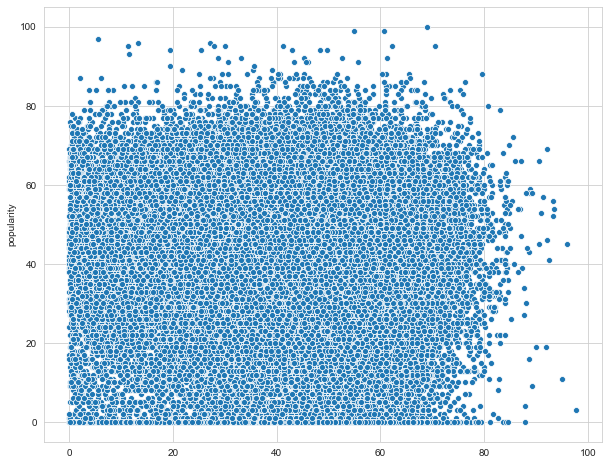

In [28]:
plt.figure(figsize=(10,8))
sns.scatterplot(pred_lr,y_test)

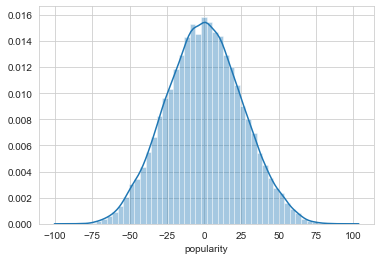

In [30]:
selisih = pred_lr - y_test

sns.distplot(selisih)
#hyperparameter

Using the regressor (RandomForeset) the scatter showed us that the popularity is not exceeding 100 and below 0